In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, recall_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MSE

In [92]:
# Upload the data 
opp_per100 = pd.read_table('/Users/devanshchawla/Downloads/Sports-Analytics-master/team_wins_2017-18/opp_per100.txt', sep=',', header = 0)
team_misc = pd.read_table('/Users/devanshchawla/Downloads/Sports-Analytics-master/team_wins_2017-18/team_misc.txt', sep=',', header = 1)
 

In [93]:
opp_per100.columns

Index(['Rk', 'Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [94]:
team_misc.columns

Index(['Rk', 'Team', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg',
       'DRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA',
       'eFG%.1', 'TOV%.1', 'DRB%', 'FT/FGA.1', 'Arena', 'Attend.',
       'Attend./G'],
      dtype='object')

In [95]:
team_misc

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attend.,Attend./G
0,1.0,Houston Rockets*,29.8,65.0,17.0,61,21,8.48,-0.27,8.21,...,12.7,21.3,0.233,0.521,13.4,79.9,0.171,Toyota Center,732722,17871
1,2.0,Toronto Raptors*,25.8,59.0,23.0,60,22,7.78,-0.49,7.29,...,12.1,23.0,0.198,0.501,13.0,77.7,0.212,Air Canada Centre,813431,19840
2,3.0,Golden State Warriors*,28.8,58.0,24.0,56,26,5.98,-0.19,5.79,...,14.1,21.0,0.195,0.504,12.6,76.3,0.186,Oracle Arena,803436,19596
3,4.0,Utah Jazz*,26.7,48.0,34.0,53,29,4.30,0.17,4.47,...,13.7,21.5,0.202,0.506,14.0,79.8,0.190,Vivint Smart Home Arena,734806,17922
4,5.0,Philadelphia 76ers*,25.8,52.0,30.0,53,29,4.50,-0.20,4.30,...,14.6,25.3,0.198,0.492,12.6,78.6,0.218,Wells Fargo Center,833503,20361
5,6.0,Oklahoma City Thunder*,27.3,48.0,34.0,50,32,3.41,0.00,3.42,...,12.4,27.7,0.197,0.525,14.7,77.4,0.193,Chesapeake Energy Arena,746322,18203
6,7.0,Boston Celtics*,24.7,55.0,27.0,51,31,3.59,-0.35,3.23,...,13.0,21.5,0.188,0.495,13.0,78.4,0.191,TD Garden,763584,18624
7,8.0,San Antonio Spurs*,29.3,47.0,35.0,49,33,2.89,0.00,2.89,...,12.2,23.7,0.189,0.507,13.2,78.6,0.170,AT&T Center,754562,18404
8,9.0,Portland Trail Blazers*,25.6,49.0,33.0,48,34,2.60,0.00,2.60,...,12.3,23.3,0.192,0.503,11.7,79.1,0.193,Moda Center,795750,19409
9,10.0,Minnesota Timberwolves*,27.1,47.0,35.0,47,35,2.23,0.12,2.35,...,11.4,24.4,0.225,0.539,13.9,76.4,0.189,Target Center,699308,17056


In [96]:
team_misc.isna().sum()

Rk           1
Team         0
Age          0
W            1
L            1
PW           0
PL           0
MOV          0
SOS          0
SRS          0
ORtg         0
DRtg         0
Pace         0
FTr          0
3PAr         0
TS%          0
eFG%         0
TOV%         0
ORB%         0
FT/FGA       0
eFG%.1       0
TOV%.1       0
DRB%         0
FT/FGA.1     0
Arena        1
Attend.      0
Attend./G    0
dtype: int64

In [97]:
team_misc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 27 columns):
Rk           30 non-null float64
Team         31 non-null object
Age          31 non-null float64
W            30 non-null float64
L            30 non-null float64
PW           31 non-null int64
PL           31 non-null int64
MOV          31 non-null float64
SOS          31 non-null float64
SRS          31 non-null float64
ORtg         31 non-null float64
DRtg         31 non-null float64
Pace         31 non-null float64
FTr          31 non-null float64
3PAr         31 non-null float64
TS%          31 non-null float64
eFG%         31 non-null float64
TOV%         31 non-null float64
ORB%         31 non-null float64
FT/FGA       31 non-null float64
eFG%.1       31 non-null float64
TOV%.1       31 non-null float64
DRB%         31 non-null float64
FT/FGA.1     31 non-null float64
Arena        30 non-null object
Attend.      31 non-null int64
Attend./G    31 non-null int64
dtypes: float64(

In [98]:
team_misc = team_misc.dropna()
team_misc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 27 columns):
Rk           30 non-null float64
Team         30 non-null object
Age          30 non-null float64
W            30 non-null float64
L            30 non-null float64
PW           30 non-null int64
PL           30 non-null int64
MOV          30 non-null float64
SOS          30 non-null float64
SRS          30 non-null float64
ORtg         30 non-null float64
DRtg         30 non-null float64
Pace         30 non-null float64
FTr          30 non-null float64
3PAr         30 non-null float64
TS%          30 non-null float64
eFG%         30 non-null float64
TOV%         30 non-null float64
ORB%         30 non-null float64
FT/FGA       30 non-null float64
eFG%.1       30 non-null float64
TOV%.1       30 non-null float64
DRB%         30 non-null float64
FT/FGA.1     30 non-null float64
Arena        30 non-null object
Attend.      30 non-null int64
Attend./G    30 non-null int64
dtypes: float64(

In [99]:
df = team_misc[['eFG%', 'TOV%','DRB%','ORB%','FT/FGA']]
X = df.values
y = team_misc['W'].values

In [100]:
np.where(np.isnan(df))

(array([], dtype=int64), array([], dtype=int64))

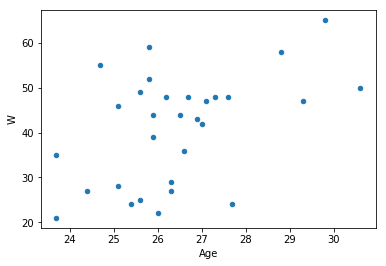

In [101]:
team_misc.plot(kind='scatter', y='W',x='Age')

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [103]:
#using linear regression

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(np.sqrt(MSE(y_test,y_pred)))

2.333963446456914


In [104]:
print(y_pred,",",y_test)

[24.58552162 43.9737677  32.10447457 52.66924103 43.98941338 50.05653366
 32.68838835 23.56576671 39.32523528] , [27. 42. 28. 36. 49. 47. 27. 25. 48.]


In [105]:
a = np.arange(1,10)
error = []
for i in a :
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error.append(np.sqrt(MSE(y_test,y_pred))) 

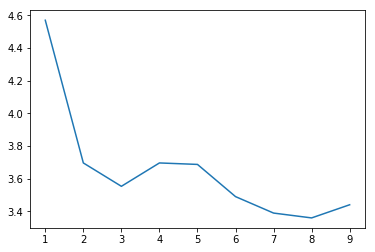

In [106]:
plt.plot(a,error)